# The Canonical Ensemble
In statistical mechanics, an ensemble is a large set of imaginary copies of a system, considered under the same macroscopic conditions. In the canonical ensemble, each system in the ensemble is in thermal contact with a heat reservoir at a fixed temperature $T$ (the system can exchange energy with the environment, but has fixed volume and number of particles). The probability of finding the system in a particular microstate $s$ with energy $E_s$ is given by the Boltzmann distribution:
$$P_s = \frac{e^{-E_s/k_B T}}{Z}$$
where $k_B$ is Boltzmann’s constant and $Z$ is the normalization constant. Since the probabilities must sum to 1,
$$Z = \sum_s e^{-E_s/k_B T}$$
summing over all possible microstates $s$. This quantity $Z$ is called the partition function of the system. It encodes the statistical properties of the system and ensures $P_s$ is properly normalized.

Using the Boltzmann distribution, we can compute ensemble averages of physical quantities. The ensemble average of an observable $A$ is defined as $\langle A \rangle = \sum_s A_s P_s$. In particular, the mean energy is:
$$\langle E\rangle = \sum_s E_s P_s = \frac{1}{Z}E_s e^{-\beta E_s}$$
with $\beta = 1/(k_B T)$. (In these equations, $E_s$ and $A_s$ are the energy and the value of $A$ in microstate $s$.)

## Using The Metropolis algorithm
In practice, for a system with many degrees of freedom, the sum over all microstates is astronomically large and cannot be evaluated directly. We therefore use Monte Carlo methods to estimate ensemble averages by sampling representative states. For a general observable $A$, the exact ensemble average is
$$\langle A\rangle = \frac{1}{Z} \sum_s A_s e^{-\beta E_s}$$
The idea of Monte Carlo sampling is to generate a representative set of $m$ configurations (microstates) and approximate the average by a sample mean:
$$\langle A\rangle \approx \frac{1}{Z} \sum_s^m A_s e^{-\beta E_s}$$
where the sum is over the sampled configurations.

A crude Monte Carlo approach would be to generate configurations completely at random, calculate $A_s e^{-\beta E_s}$ for each, and average. This is equivalent to the “hit-and-miss” method for evaluating integrals. However, this approach is very inefficient because most randomly chosen states have extremely low Boltzmann weight $e^{-\beta E}$ and contribute almost nothing to the average. Instead, we prefer to sample important configurations -those with large $e^{-\beta E_s}$ – more frequently. This strategy is called *importance sampling*. The most convenient choice is to generate configurations with probability proportional to the Boltzmann weight itself $P_s$.

If we sample states with the Boltzmann probability $P_s$, then each sampled state $s$ is already weighted correctly in the average. In that case, the estimator for the ensemble average simplifies to the simple arithmetic mean of the observable over the $m$ sampled configurations:
$$\langle A\rangle \approx \frac{1}{m}\sum_{s=1}^m A_s$$
since each sampled $A_s$ effectively represents $A_s/P_s$ weighted by $e^{-\beta E_s}$ (and the normalization factors cancel) – we are averaging with respect to the distribution $P_s$ itself.

To generate sample states with probability $P_s$, we perform a random walk in configuration space using the Metropolis Monte Carlo algorithm. The Monte Carlo procedure constructs a sequence of configurations $i \to j \to \dots$ such that the fraction of time spent in each state corresponds to $P_s$. One way to ensure this is to design the transition probability $W(i\to j)$ between states $i$ and $j$ to satisfy detailed balance:
$$W(i\rightarrow j)e^{-\beta E_i} = W(j\rightarrow i)e^{-\beta E_j}$$
A convenient choice is the Metropolis choice:
$$W(i\rightarrow j) = min\left(1,P_j/P_i\right) = min(1,e^{-\beta(E_j-E_i)})$$
We see that the partition function $Z$ cancels in the ratio $P_j/P_i$, so we don’t need to know it explicitly. Moves that lead to a lower energy ($E_j < E_i$) have $P_j/P_i > 1$, so $W=1$ (always accepted). Moves that increase the energy are accepted with probability $e^{-\beta \Delta E}$, where $\Delta E = E_j - E_i > 0$. (This choice of $W$ is not unique – any transition rule satisfying detailed balance will eventually produce the Boltzmann distribution. For example, another common choice is $W(i\to j) = 1/\left(e^{-\beta (E_j - E_i)} + 1\right)$, which would give $W=1/2$ if $\Delta E=0$.)

Using the Metropolis criterion, we can outline the Monte Carlo simulation algorithm as follows:
1. Establish an initial configuration. This means set the starting values of all degrees of freedom (for example, assign an initial velocity to each particle in a gas, or an initial orientation to each spin in a spin system).
2. Make a random trial change in the configuration. For example, in a spin system you might flip a randomly chosen spin. In our 1D gas example, you could pick one particle at random and modify its velocity by a small random amount.
3. Compute the change in the energy $\Delta E$ due to the trial change. That is, calculate $E_j - E_i$ between the new trial state and the old state. (For an ideal gas particle with mass $m=1$, $\Delta E = \tfrac{1}{2}(v_{\text{trial}}^2 - v_{\text{old}}^2)$.)
4. If $\Delta E \le 0$, accept the new configuration. In this case the trial move lowers (or leaves unchanged) the energy, so it is automatically accepted as the new state. (Such moves make the configuration more probable or equally probable.)
5. If $\Delta E > 0$, compute the transition probability $W = e^{-\beta \Delta E}$. This is the probability of accepting an energy-increasing move, derived from the Boltzmann factor. A larger increase in energy leads to a smaller $W$.
6. Generate a random number $r$ uniformly in $[0,1]$.
7. If $r \le W$, accept the new configuration; otherwise, reject it. In other words, even if the energy rises, accept the move with probability $W$. If the move is rejected, the system stays in the previous state for this step. (This step allows the system to occasionally absorb energy from the thermal reservoir, mimicking contact with a heat bath.)
8. Repeat steps 2–7 to obtain a long sequence of configurations (Monte Carlo steps). Each accepted move changes the state. After many such random trials, the system will wander through configuration space according to $W$, sampling states with the desired Boltzmann probabilities.
9. After equilibration, compute averages using the generated configurations. Once the system has reached thermal equilibrium, you can estimate observables as averages over the sampled configurations (ignoring the initial “warm-up” period). These sample averages correspond to the ensemble averages $\langle A \rangle$ in the canonical ensemble.

## Important conditions for validity
For the Monte Carlo sampling to be valid, two conditions are important: detailed balance and ergodicity. The Metropolis choice of $W$ above ensures detailed balance. Ergodicity means that it must be possible for the random walk to eventually reach any configuration of the system. The chosen set of trial moves should be capable of exploring the entire phase space given enough time. If some regions of configuration space are inaccessible (for example, due to only making very local moves), then one should introduce additional moves or algorithms to ensure the system can fully explore all states.

# Example: Classical gas in 1D
In this case, we assume that the particles do not interact and the particle velocities are continuous and unbounded. The energy of the system is the sum of the kinetic energies of the individual particles. Hence, for an ideal gas, the only coordinates of interest are the velocities of the particles. To change a configuration, we choose a particle at random and change its velocity by a random amount according to the Metropolis transition probability. For simplicity we consider only the one-dimensional case. 

1. Simulate an ideal gas of $N$ particles in 1D. Choose $N=20$, $T=100$ and 200 Monte Carlo steps. Give all the particles the same initial velocity $v_0=10$. Determine the value of the maximum velocity change $\Delta v$ so that the acceptance ratio is approximately $50%$. What is the mean kinetic energy and mean velocity of the particles?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 20      # number of particles
T = 100      # temperature
MC_steps = 200  # number of Monte Carlo steps (trials)
v_init = 10.0   # initial velocity for all particles
k_B = 1.0       # Boltzmann constant (use 1.0 in these units)
beta = 1.0 / (k_B * T)

# Function to attempt a velocity change for one particle (Metropolis step)
def attempt_move(v, idx, delta):
    v_old = v[idx]
    v_trial = v_old + (2 * np.random.rand() - 1) * delta   # trial velocity in [v_old-δ, v_old+δ]
    # Energy change ΔE = 0.5*(v_trial^2 - v_old^2)  (assuming m=1 and k_B=1)
    dE = 0.5 * (v_trial**2 - v_old**2)
    if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
        # Accept the move
        v[idx] = v_trial
        return 1  # accepted
    else:
        return 0  # not accepted

# Try different Δv values to find ~50% acceptance
deltas_to_test = [5, 15, 25, 30, 35]
accpt = []
print("Testing various Δv values for acceptance ratio:")
for delta in deltas_to_test:
    v_test = np.full(N, v_init)
    accept_count = 0
    for step in range(MC_steps):
        i = np.random.randint(0, N)
        accept_count += attempt_move(v_test, i, delta)
    acc_ratio = accept_count / MC_steps
    accpt.append(acc_ratio)
    print(f"Δv = {delta}: acceptance ≈ {acc_ratio:}")

# Choose Δv that gives ~50% acceptance (from the tests above, around 30)
diff = list(abs(0.50*np.ones(len(accpt))-accpt))
min_index = diff.index(min(diff))
delta_opt = deltas_to_test[min_index]
print(f"\nUsing Δv = {delta_opt} for the simulation.")

# Run simulation with delta_opt to measure mean energy and velocity
v = np.full(N, v_init)
accept_count = 0
for step in range(MC_steps):
    j = np.random.randint(0, N)
    accept_count += attempt_move(v, j, delta_opt)
accept_ratio = accept_count / MC_steps
mean_velocity = np.mean(v)
mean_energy_per_particle = 0.5 * np.sum(v**2) / N

print(f"Acceptance ratio ≈ {accept_ratio:}")
print(f"Mean kinetic energy per particle ≈ {mean_energy_per_particle:}")
print(f"Mean particle velocity ≈ {mean_velocity:}")


Testing various Δv values for acceptance ratio:
Δv = 5: acceptance ≈ 0.865
Δv = 15: acceptance ≈ 0.755
Δv = 25: acceptance ≈ 0.58
Δv = 30: acceptance ≈ 0.51
Δv = 35: acceptance ≈ 0.405

Using Δv = 30 for the simulation.
Acceptance ratio ≈ 0.43
Mean kinetic energy per particle ≈ 31.401346428295614
Mean particle velocity ≈ 1.0177049217316312


2. We might expect that the total energy of an ideal gas would remain constant since the particles do not interact with each other and hence cannot exchange energy directly. What is the initial value of the energy of the system? Does it remain constant? If it does not, explain how the energy changes. Explain why the measured mean particle velocity is zero even though the initial particle velocities are not zero.

Initial total energy = 1000.00
Final total energy after 1000 steps = 7195.87
Initial mean particle velocity = 10.00
Final mean particle velocity = -2.20


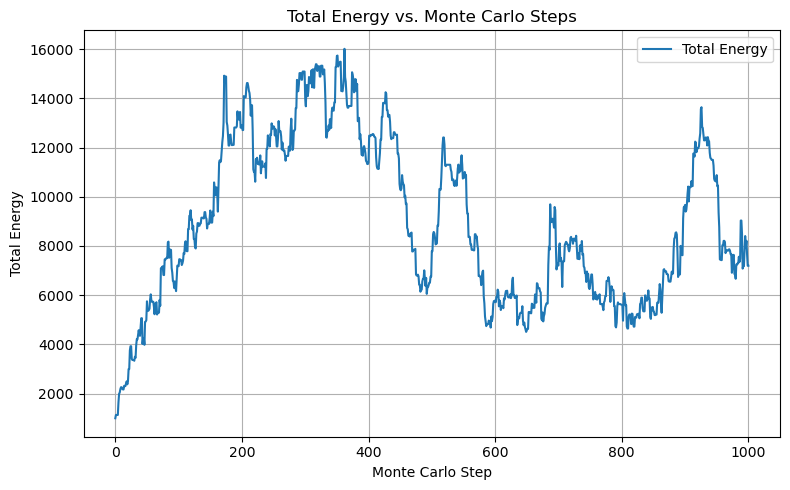

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 20
T = 100
delta = 30  # Chosen to give ~50% acceptance
steps_total = 1000

# Initialization
v = np.full(N, 10.0)  # Start all particles at v0 = 10
total_energy = 0.5 * np.sum(v**2)
initial_energy = total_energy
initial_mean_v = np.mean(v)

# Store total energy at each step
energy_trace = [total_energy]

# Monte Carlo simulation
for step in range(1, steps_total + 1):
    i = np.random.randint(0, N)
    v_old = v[i]
    v_trial = v_old + (2 * np.random.rand() - 1) * delta
    dE = 0.5 * (v_trial**2 - v_old**2)
    
    if dE <= 0 or np.random.rand() < np.exp(-dE / T):
        v[i] = v_trial
        total_energy += dE

    energy_trace.append(total_energy)

# Final values
final_energy = total_energy
final_mean_v = np.mean(v)

print(f"Initial total energy = {initial_energy:.2f}")
print(f"Final total energy after {steps_total} steps = {final_energy:.2f}")
print(f"Initial mean particle velocity = {initial_mean_v:.2f}")
print(f"Final mean particle velocity = {final_mean_v:.2f}")

# Plot energy vs. steps
plt.figure(figsize=(8, 5))
plt.plot(energy_trace, label='Total Energy')
plt.xlabel('Monte Carlo Step')
plt.ylabel('Total Energy')
plt.title('Total Energy vs. Monte Carlo Steps')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


3. What is a simple criterion for “thermal equilibrium”? Estimate the number of Monte Carlo steps per particle necessary for the system to reach thermal equilibrium. What choice of the initial velocities allows the system to reach thermal equilibrium at temperature $T$ as quickly as possible?

In [12]:
import numpy as np

N = 20
T = 100
delta = 30  # from previous tuning
max_steps = 1000  # maximum steps to test
# Scenario 1: initial velocities all +v0
v1 = np.full(N, 10.0)
# Scenario 2: initial half +v0, half -v0 (zero net momentum)
v2 = np.concatenate((np.full(N//2, 10.0), np.full(N - N//2, -10.0)))

def steps_to_equilibration(v):
    """Return the number of steps until ~50% of velocities are negative (sign of equilibrium)."""
    N = len(v)
    target_fraction = 0.5
    frac_neg = np.sum(v < 0) / N
    if 0.4 <= frac_neg <= 0.6:
        return 0
    for step in range(1, max_steps + 1):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):
            v[i] = v_trial
        frac_neg = np.sum(v < 0) / N
        if 0.4 <= frac_neg <= 0.6:
            return step
    return max_steps

steps_eq1 = steps_to_equilibration(v1.copy())
steps_eq2 = steps_to_equilibration(v2.copy())
print(f"Scenario 1 (all initial v = +10): ~{steps_eq1} steps to ~50% negative velocities")
print(f"Scenario 2 (half v = +10, half v = -10): ~{steps_eq2} steps to ~50% negative velocities")


Scenario 1 (all initial v = +10): ~20 steps to ~50% negative velocities
Scenario 2 (half v = +10, half v = -10): ~0 steps to ~50% negative velocities


4. Compute the mean energy per particle for $T=10$, $100$ and $400$. In order to compute the averages after the system has reached thermal equilibrium, start measuring only after equilibrium has been achieved. Increase the number of Monte Carlo steps until the desired averages do not change appreciably. What is the approximate number of warmup steps for $N=10$ and $T=100$, and for $N=40$ and $T=100$? If the number of warmup steps is different in the two cases, explain the reason for this difference.

T=10: mean energy per particle ≈ 5.19
T=100: mean energy per particle ≈ 49.45
T=200: mean energy per particle ≈ 103.08
T=300: mean energy per particle ≈ 154.18
T=400: mean energy per particle ≈ 205.26


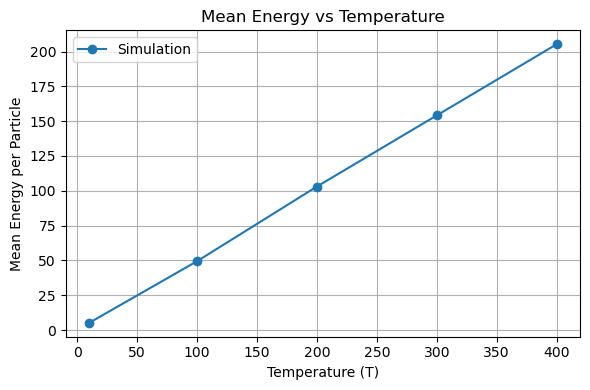


N=10, starting from all v=0:
 After ~10 steps/particle: E per particle = 34.20
 After ~20 steps/particle: E per particle = 34.58
 After ~30 steps/particle: E per particle = 53.03
 After ~40 steps/particle: E per particle = 37.25
 After ~50 steps/particle: E per particle = 41.89
 After ~60 steps/particle: E per particle = 40.73
 After ~70 steps/particle: E per particle = 56.20
 After ~80 steps/particle: E per particle = 43.19
 After ~90 steps/particle: E per particle = 55.75
 After ~100 steps/particle: E per particle = 103.92

N=400, starting from all v=0:
 After ~10 steps/particle: E per particle = 49.83
 After ~20 steps/particle: E per particle = 50.91
 After ~30 steps/particle: E per particle = 49.63
 After ~40 steps/particle: E per particle = 45.94
 After ~50 steps/particle: E per particle = 45.96
 After ~60 steps/particle: E per particle = 49.79
 After ~70 steps/particle: E per particle = 51.37
 After ~80 steps/particle: E per particle = 49.02
 After ~90 steps/particle: E per part

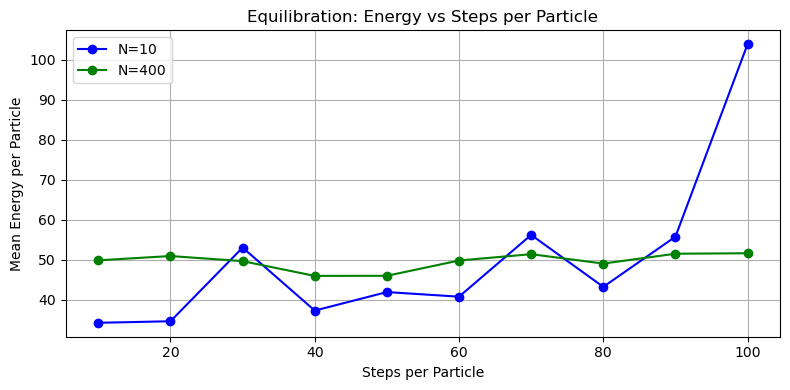

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Part 4A: Plot mean energy per particle vs temperature
N = 20
temperatures = [10, 100,200, 300, 400]
mean_energies = []

for T in temperatures:
    beta = 1.0 / T
    delta = 3 * np.sqrt(T)  # Choose Δv ~ 3 * sqrt(T) for ~50% acceptance

    # Equilibrate (warmup)
    v = np.zeros(N)
    warmup_steps = 1000
    for step in range(warmup_steps):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial

    # Measurement
    measure_steps = 5000
    E_sum = 0.0
    for step in range(measure_steps):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial
        E_sum += 0.5 * np.sum(v**2)

    mean_total_E = E_sum / measure_steps
    mean_E_per_particle = mean_total_E / N
    mean_energies.append(mean_E_per_particle)

    print(f"T={T}: mean energy per particle ≈ {mean_E_per_particle:.2f}")

# Plot energy per particle vs. temperature
plt.figure(figsize=(6, 4))
plt.plot(temperatures, mean_energies, 'o-', label='Simulation')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Energy per Particle')
plt.title('Mean Energy vs Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Part 4B: Warm-up behavior for N = 10 and N = 40
plt.figure(figsize=(8, 4))
colors = {10: 'blue', 400: 'green'}

for N in [10, 400]:
    T = 100
    beta = 1.0 / T
    delta = 3 * np.sqrt(T)
    v = np.zeros(N)
    total_energy = 0.5 * np.sum(v**2)
    max_steps = 100 * N  # simulate up to 100 steps per particle

    energy_trace = []

    print(f"\nN={N}, starting from all v=0:")
    for step in range(1, max_steps + 1):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial
            total_energy += dE

        # Record energy per particle every 10 steps
        if step % (10 * N) == 0:
            steps_per_particle = step // N
            E_per_particle = total_energy / N
            energy_trace.append(E_per_particle)
            print(f" After ~{steps_per_particle} steps/particle: E per particle = {E_per_particle:.2f}")

    # Plot warm-up behavior
    steps_x = [10 * (i+1) for i in range(len(energy_trace))]
    plt.plot(steps_x, energy_trace, 'o-', label=f'N={N}', color=colors[N])

plt.xlabel('Steps per Particle')
plt.ylabel('Mean Energy per Particle')
plt.title('Equilibration: Energy vs Steps per Particle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


5. Compute the probability $P(E),dE$ for the system of $N$ particles to have a total energy between $E$ and $E+dE$. Do you expect $P(E)$ to be proportional to $e^{-\beta E}$? Plot $P(E)$ as a function of $E$ and describe the qualitative behavior of $P(E)$. Does the plot of $\ln P(E)$ yield a straight line?

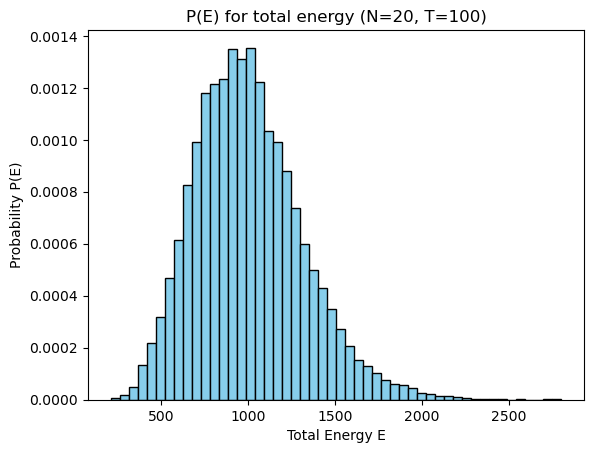

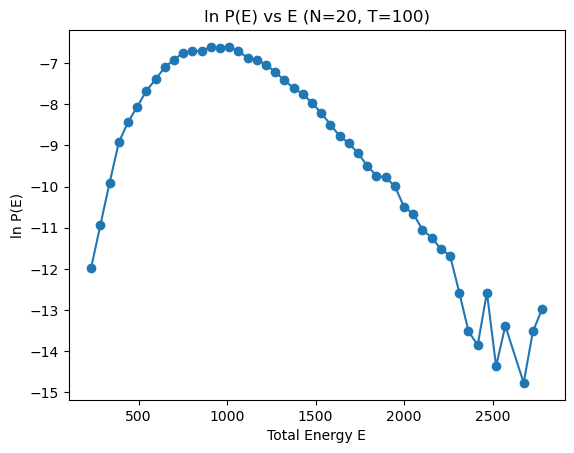

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
T = 100
beta = 1.0 / T
delta = 30  # using Δv ≈ 30 from earlier tuning for T=100
# Equilibrate the system first
v = np.full(N, 10.0)  # start with all velocities = 10
total_energy = 0.5 * np.sum(v**2)
warmup_steps = 1000
for step in range(warmup_steps):
    i = np.random.randint(0, N)
    v_old = v[i]
    v_trial = v_old + (2 * np.random.rand() - 1) * delta
    dE = 0.5 * (v_trial**2 - v_old**2)
    if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
        v[i] = v_trial
        total_energy += dE

# Collect energy samples over a long run
energy_samples = []
num_samples = 100000
for step in range(num_samples):
    i = np.random.randint(0, N)
    v_old = v[i]
    v_trial = v_old + (2 * np.random.rand() - 1) * delta
    dE = 0.5 * (v_trial**2 - v_old**2)
    if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
        v[i] = v_trial
        total_energy += dE
    energy_samples.append(total_energy)

# Histogram for P(E)
plt.figure()
plt.hist(energy_samples, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title(f"P(E) for total energy (N={N}, T={T})")
plt.xlabel("Total Energy E")
plt.ylabel("Probability P(E)")

# Plot ln P(E)
hist, bin_edges = np.histogram(energy_samples, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
mask = hist > 0  # consider only bins with non-zero probability
plt.figure()
plt.plot(bin_centers[mask], np.log(hist[mask]), 'o-')
plt.title(f"ln P(E) vs E (N={N}, T={T})")
plt.xlabel("Total Energy E")
plt.ylabel("ln P(E)")
plt.show()



6. Compute the mean energy for $T=10$, $20$, $30$,... $90$, $100$ and $110$ and estimate the heat capacity.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 20
T_values = list(range(10, 111, 10))  # Temperatures: 10, 20, ..., 110
mean_energy = []

# Loop over temperatures
for T in T_values:
    beta = 1.0 / T
    delta = 3 * np.sqrt(T)  # Tune delta v for ~50% acceptance

    # Equilibrate
    v = np.zeros(N)
    for step in range(1000):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial

    # Measure energy
    E_sum = 0.0
    steps = 5000
    for step in range(steps):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial
        E_sum += 0.5 * np.sum(v**2)

    mean_E = E_sum / steps
    mean_energy.append(mean_E)
    print(f"T={T}: mean energy per particle ≈ {mean_E/N:.2f}")

# Plot: mean energy per particle vs T
mean_E_per_particle = [E/N for E in mean_energy]

plt.figure(figsize=(7, 4))
plt.plot(T_values, mean_E_per_particle, 'o-', label='Simulation')
plt.plot(T_values, [0.5 * T for T in T_values], '--', color='gray', label='Theoretical (E/N = 0.5 T)')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Energy per Particle')
plt.title('Mean Energy per Particle vs Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Estimate heat capacity from linear slope
E_Tmin = mean_energy[0]      # total energy at T=10
E_Tmax = mean_energy[-1]     # total energy at T=110
delta_T = T_values[-1] - T_values[0]
C_total_est = (E_Tmax - E_Tmin) / delta_T
C_per_particle_est = C_total_est / N

print(f"\nEstimated heat capacity per particle ≈ {C_per_particle_est:.3f}")
print(f"Estimated total heat capacity (N={N}) ≈ {C_total_est:.3f}")



7. Compute the mean square energy fluctuations $\langle \Delta E^2 \rangle = \langle E^2 \rangle - \langle E \rangle^2$ for $T=10$ and $T=40$. Compare the magnitude of the ratio $\langle \Delta E^2 \rangle / T^2$ with the heat capacity determined in the previous item.

In [25]:
import numpy as np

N = 60
temperatures = [10, 40,80]
sample_steps = 20000
for T in temperatures:
    beta = 1.0 / T
    delta = 3 * np.sqrt(T)
    v = np.zeros(N)
    # Equilibrate
    for step in range(2000):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial
    # Sample energy fluctuations
    E_sum = 0.0
    E2_sum = 0.0
    total_energy = 0.5 * np.sum(v**2)
    for step in range(sample_steps):
        i = np.random.randint(0, N)
        v_old = v[i]
        v_trial = v_old + (2 * np.random.rand() - 1) * delta
        dE = 0.5 * (v_trial**2 - v_old**2)
        if dE <= 0 or np.random.rand() < np.exp(-dE * beta):
            v[i] = v_trial
            total_energy += dE
        E_sum += total_energy
        E2_sum += total_energy**2
    E_mean = E_sum / sample_steps
    E2_mean = E2_sum / sample_steps
    fluct = E2_mean - E_mean**2
    ratio = fluct / (T**2)
    print(f"T={T}: ⟨ΔE^2⟩/T^2 ≈ {ratio:.2f}")
expected_C = 0.5 * N
print(f"(Expected heat capacity = {expected_C:.2f})")


T=10: ⟨ΔE^2⟩/T^2 ≈ 27.06
T=40: ⟨ΔE^2⟩/T^2 ≈ 30.57
T=80: ⟨ΔE^2⟩/T^2 ≈ 34.82
(Expected heat capacity = 30.00)


# Appendix A: Converting Units

In our simulations, we use **dimensionless units** by setting the Boltzmann constant $k_B = 1$ and particle mass $m = 1$. To interpret our results in **SI units**, we need to reintroduce physical constants. Here's how:

---

## Step 1: Reintroduce $k_B$ to recover energy in joules

The Boltzmann constant in SI units is:
$$
k_B = 1.380649 \times 10^{-23} \ \text{J/K}
$$
In the simulation, mean energy per particle is expressed in units of $k_B T$. To convert to SI energy units:
$$
\langle E \rangle_{\text{SI}} = \langle E \rangle_{\text{sim}} \cdot k_B \cdot T
$$
For example, if your simulation reports $\langle E \rangle_{\text{sim}} = 0.5$ at $T = 300 \ \text{K}$, then:
$$
\langle E \rangle_{\text{SI}} = 0.5 \cdot 1.38 \times 10^{-23} \cdot 300 \approx 2.07 \times 10^{-21} \ \text{J}
$$

---

## Step 2: Convert simulation velocities to m/s

In simulation units, we set the mass $m = 1$, and kinetic energy is computed as:
$$
E = \frac{1}{2} v^2
$$
To convert simulation velocities to physical velocities in SI units, use:
$$
v_{\text{SI}} = v_{\text{sim}} \cdot \sqrt{\frac{k_B T}{m}}
$$
For example, if you are simulating helium atoms (with $m = 6.64 \times 10^{-27} \ \text{kg}$) at $T = 100 \ \text{K}$, then the velocity unit is:
$$
\sqrt{\frac{1.38 \times 10^{-23} \cdot 100}{6.64 \times 10^{-27}}} \approx 456 \ \text{m/s}
$$
So a simulated particle with $v_{\text{sim}} = 1$ corresponds to:
$$
v_{\text{SI}} \approx 456 \ \text{m/s}
$$

---

## Step 3: Convert heat capacity to SI units

In the simulation, the heat capacity per particle is typically:
$$
C_{\text{sim}} = \frac{1}{2}
$$
To convert this to SI units, multiply by $k_B$:
$$
C_{\text{SI}} = C_{\text{sim}} \cdot k_B = \frac{1}{2} \cdot 1.38 \times 10^{-23} \ \text{J/K}
$$
For a system of $N$ particles, total heat capacity is:
$$
C_{\text{total}} = \frac{N}{2} \cdot k_B
$$
For example, if $N = 20$, then:
$$
C_{\text{total}} \approx 10 \cdot 1.38 \times 10^{-23} = 1.38 \times 10^{-22} \ \text{J/K}
$$

---

## Summary

- Multiply energy by $k_B T$ to get joules.
- Multiply velocity by $\sqrt{k_B T / m}$ to get m/s.
- Multiply heat capacity by $k_B$ to get J/K.

These conversions allow you to interpret your dimensionless simulation results in real-world physical units.
